In [234]:
import pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder

mpl.rcParams['figure.figsize'] = [16, 9]

#ignore all warnings
import warnings
warnings.filterwarnings(action= 'ignore')

## Data Cleaning & Preperation (Visualization).

In [235]:
df = pd.read_csv(r'taxi_trip_pricing (1).csv')
df = df[['Time_of_Day', 'Day_of_Week', 'Passenger_Count',
    'Traffic_Conditions', 'Weather', 'Base_Fare',
    'Trip_Distance_km', 'Per_Km_Rate',
    'Trip_Duration_Minutes', 'Per_Minute_Rate',  'Trip_Price']]
df.shape

(1000, 11)

## Step 1: Null handling.

In [236]:
df.isnull().sum() #sum of null values

Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Trip_Distance_km         50
Per_Km_Rate              50
Trip_Duration_Minutes    50
Per_Minute_Rate          50
Trip_Price               49
dtype: int64

In [237]:
for col in df.select_dtypes(include= 'object').columns:
    print(f"The Unique values for {col}: {df[col].unique()}")

The Unique values for Time_of_Day: ['Morning' 'Afternoon' 'Evening' 'Night' nan]
The Unique values for Day_of_Week: ['Weekday' 'Weekend' nan]
The Unique values for Traffic_Conditions: ['Low' 'High' 'Medium' nan]
The Unique values for Weather: ['Clear' nan 'Rain' 'Snow']


In [238]:
print(f"The correlation between Passenger Count and Trip price: \n\n{df[['Passenger_Count', 'Trip_Price']].corr()}") #eger corraltion -0.05 le 0.05 arasindadirsa, yeni 0-a cox yaxindirsa
#demekki corralatation yoxdur, demeli Passenger count u sile bilerik

df.drop('Passenger_Count', axis= 1, inplace= True)

The correlation between Passenger Count and Trip price: 

                 Passenger_Count  Trip_Price
Passenger_Count         1.000000   -0.014223
Trip_Price             -0.014223    1.000000


In [239]:
calculating_trip_price = df[~(df['Trip_Distance_km'].isnull()) & ~(df['Per_Km_Rate'].isnull()) & ~(df['Per_Minute_Rate'].isnull()) & \
~(df['Trip_Duration_Minutes'].isnull()) & ~(df['Base_Fare'].isnull()) & ~(df['Trip_Price'].isnull()) ]

calculating_trip_price['Appriximate_Price'] = calculating_trip_price['Base_Fare'] + \
(calculating_trip_price['Trip_Distance_km'] * calculating_trip_price['Per_Km_Rate']) + \
(calculating_trip_price['Per_Minute_Rate'] * calculating_trip_price['Trip_Duration_Minutes'])
calculating_trip_price['Diff_between_Prices'] = calculating_trip_price['Trip_Price'] - calculating_trip_price['Appriximate_Price']

In [240]:
(146 * 1.7) + (0.3 * 61) + 4.79 #100 km dan cox olanlari arashdirin gorun nedi tema

271.29

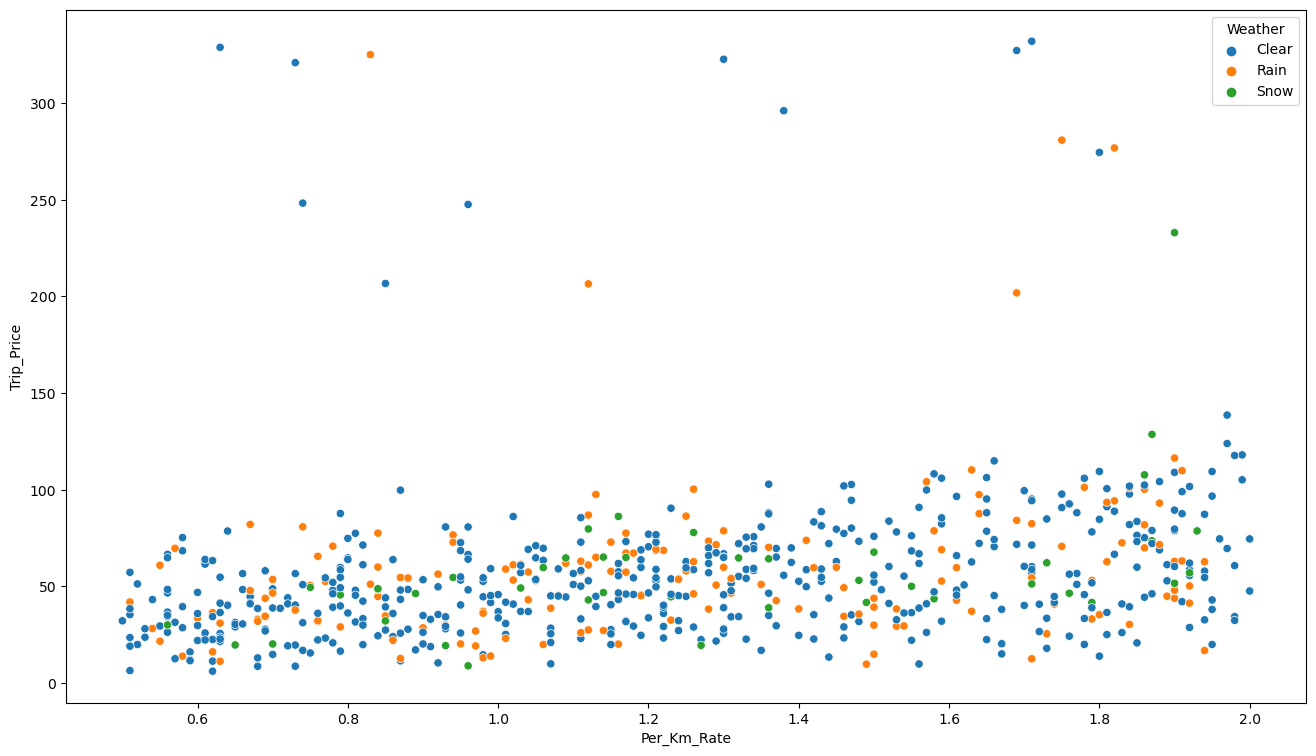

In [241]:
sns.scatterplot(data= calculating_trip_price,
                x= 'Per_Km_Rate',
                y= 'Trip_Price',
                hue= 'Weather')
plt.show()

In [242]:
# calculating_trip_price.sort_values('Trip_Distance_km', ascending= False).head(20)

In [243]:
# sns.boxplot(df['Trip_Price'])
# plt.show()

In [244]:
other_df.shape

(20, 10)

In [245]:
# other_df = df[df['Trip_Distance_km']  > 100]
# df = df[df['Trip_Distance_km']  < 100]

#null handling on "Trip Distance KM"
for idx in df[df['Trip_Distance_km'].isnull()].index:
    non_null_trip_disntance_km_bool = df[['Base_Fare', 'Per_Km_Rate', 'Trip_Duration_Minutes',
        'Per_Minute_Rate', 'Trip_Price']].loc[idx].isnull().any()
    if non_null_trip_disntance_km_bool == False:
        df.loc[idx, 'Trip_Distance_km'] =  (df.loc[idx, 'Trip_Price'] - df.loc[idx, 'Base_Fare'] -\
        (df.loc[idx, 'Per_Minute_Rate'] * df.loc[idx, 'Trip_Duration_Minutes'])) / \
        df.loc[idx, 'Per_Km_Rate']

In [246]:
#null handling on "Per_Km_Rate"
for idx in df[df['Per_Km_Rate'].isnull()].index:
    non_null_per_km_rate_bool = df[['Base_Fare', 'Trip_Distance_km',
                                    'Trip_Duration_Minutes','Per_Minute_Rate',
                                    'Trip_Price']].loc[idx].isnull().any()
    if non_null_per_km_rate_bool == False:
        df.loc[idx, 'Per_Km_Rate'] =  (df.loc[idx, 'Trip_Price'] - df.loc[idx, 'Base_Fare'] -\
        (df.loc[idx, 'Per_Minute_Rate'] * df.loc[idx, 'Trip_Duration_Minutes'])) / \
        df.loc[idx, 'Trip_Distance_km']

In [247]:
#null handling on "Trip_Duration_Minutes"
for idx in df[df['Trip_Duration_Minutes'].isnull()].index:
    non_null_trip_dur_min_bool = df[['Base_Fare', 'Trip_Distance_km',
                                    'Per_Km_Rate','Per_Minute_Rate',
                                    'Trip_Price']].loc[idx].isnull().any()
    if non_null_trip_dur_min_bool == False:
        df.loc[idx, 'Trip_Duration_Minutes'] =  (df.loc[idx, 'Trip_Price'] - df.loc[idx, 'Base_Fare'] -\
        (df.loc[idx, 'Trip_Distance_km'] * df.loc[idx, 'Per_Km_Rate'])) / \
        df.loc[idx, 'Per_Minute_Rate']

In [248]:
#null handling on "Per_Minute_Rate"
for idx in df[df['Per_Minute_Rate'].isnull()].index:
    non_null_per_min_rate_bool = df[['Base_Fare', 'Trip_Distance_km',
                                    'Per_Km_Rate','Trip_Duration_Minutes',
                                    'Trip_Price']].loc[idx].isnull().any()
    if non_null_per_min_rate_bool == False:
        df.loc[idx, 'Per_Minute_Rate'] =  (df.loc[idx, 'Trip_Price'] - df.loc[idx, 'Base_Fare'] -\
        (df.loc[idx, 'Trip_Distance_km'] * df.loc[idx, 'Per_Km_Rate'])) / \
        df.loc[idx, 'Trip_Duration_Minutes']

In [249]:
#null handling on "Trip_Price"
for idx in df[df['Trip_Price'].isnull()].index:
    non_null_trip_price_bool = df[['Base_Fare', 'Trip_Distance_km', 
                                   'Per_Minute_Rate','Per_Km_Rate','Trip_Duration_Minutes'
                                  ]].loc[idx].isnull().any()
    if non_null_trip_price_bool == False:
        df.loc[idx, 'Trip_Price'] =   df.loc[idx, 'Base_Fare'] +\
        (df.loc[idx, 'Trip_Distance_km'] * df.loc[idx, 'Per_Km_Rate']) + \
        (df.loc[idx, 'Trip_Duration_Minutes'] * df.loc[idx, 'Per_Minute_Rate'])

In [250]:
#null handling on "Base Fare"
for idx in df[df['Base_Fare'].isnull()].index:
    non_null_base_fare_bool = df[['Trip_Price', 'Trip_Distance_km', 'Per_Minute_Rate',
                                    'Per_Km_Rate','Trip_Duration_Minutes'
                                  ]].loc[idx].isnull().any()
    if non_null_base_fare_bool == False:
        df.loc[idx, 'Base_Fare'] =   df.loc[idx, 'Trip_Price'] - \
        ((df.loc[idx, 'Trip_Distance_km'] * df.loc[idx, 'Per_Km_Rate']) + \
        (df.loc[idx, 'Trip_Duration_Minutes'] * df.loc[idx, 'Per_Minute_Rate']))

In [251]:
null_price_df = df[(df['Trip_Price'].isnull())] #null priceler ignore oldu, 
# predict olunmalidir
df = df[~(df['Trip_Price'].isnull())]
# df = pd.concat([other_df, df])

In [252]:
df['Time_of_Day'].unique()

array(['Morning', 'Evening', 'Afternoon', 'Night', nan], dtype=object)

In [253]:
df.groupby(['Day_of_Week', 'Traffic_Conditions',
         'Weather']).agg({'Per_Km_Rate': 'mean',
                          'Per_Minute_Rate': 'mean',
                          'Trip_Price': 'mean',
                          'Base_Fare': 'mean'})

Per_Km_Rate  Per_Minute_Rate  \
Day_of_Week Traffic_Conditions Weather                                 
Weekday     High               Clear       1.180568         0.268977   
                               Rain        1.162083         0.334583   
                               Snow        1.312000         0.258000   
            Low                Clear       1.249431         0.303049   
                               Rain        1.268909         0.317979   
                               Snow        1.285882         0.332941   
            Medium             Clear       1.235806         0.289221   
                               Rain        1.296800         0.256400   
                               Snow        1.253750         0.343125   
Weekend     High               Clear       1.236471         0.271176   
                               Rain        1.080000         0.270000   
                               Snow        1.320000         0.280000   
            Low                Clear       1.224474         0.285769   
                               Rain        1.239655         0.253448   
                               Snow        1.302000         0.254000   
            Medium             Clear       1.110405         0.316892   
                               Rain        1.250333         0.297000   
                               Snow        1.293000         0.323000   

                                        Trip_Price  Base_Fare  
Day_of_Week Traffic_Conditions Weather                         
Weekday     High               Clear     66.046495   3.457356  
                               Rain      67.870185   3.557083  
                               Snow      93.280897   3.072000  
            Low                Clear     54.850106   3.487546  
                               Rain      62.218532   3.380727  
                               Snow      55.816229   3.411765  
            Medium             Clear     55.702987   3.597500  
                               Rain      57.383649   3.512157  
                               Snow      57.656656   3.834375  
Weekend     High               Clear     60.109179   3.392941  
                               Rain      55.565960   4.134000  
                               Snow      64.731600   4.600000  
            Low                Clear     50.813095   3.470779  
                               Rain      53.734518   3.331724  
                               Snow      41.951920   3.478000  
            Medium             Clear     48.939885   3.426757  
                               Rain      65.531650   3.336000  
                               Snow      49.576430   3.321000

In [254]:
df.isnull().sum()

Time_of_Day              50
Day_of_Week              48
Traffic_Conditions       50
Weather                  48
Base_Fare                 6
Trip_Distance_km          6
Per_Km_Rate               5
Trip_Duration_Minutes    11
Per_Minute_Rate           4
Trip_Price                0
dtype: int64

In [255]:
df

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Trip_Distance_km,Per_Km_Rate,Trip_Duration_Minutes,Per_Minute_Rate,Trip_Price
0,Morning,Weekday,Low,Clear,3.56,19.35,0.80,53.82,0.32,36.2624
2,Evening,Weekend,High,Clear,2.70,36.87,1.21,37.27,0.15,52.9032
3,Evening,Weekday,Low,NaN,3.48,30.33,0.51,116.81,0.15,36.4698
4,Evening,Weekday,High,Clear,2.93,8.64,0.63,22.64,0.32,15.6180
5,Afternoon,Weekend,Medium,Clear,2.55,8.64,1.71,89.33,0.48,60.2028
...,...,...,...,...,...,...,...,...,...,...
995,Afternoon,Weekend,Medium,Clear,2.39,5.49,0.62,58.39,0.49,34.4049
996,Night,Weekday,Medium,Clear,3.12,45.95,0.61,61.96,0.50,62.1295
997,Morning,Weekday,Low,Rain,2.08,7.70,1.78,54.18,0.32,33.1236
998,Morning,Weekday,Low,Clear,2.67,47.56,0.82,114.94,0.17,61.2090


In [256]:
#give each column categories based on their proba
for col in df.select_dtypes(include= 'object').columns:
    for idx in df[df[col].isnull()].index:
        category_proba = dict(df[col].value_counts(normalize= True))
        df.loc[idx, col] = np.random.choice(list(category_proba.keys()),
                 p= list(category_proba.values()))
        
#remaining null values is handled by mean of the column   
for col in list(df.isnull().sum()[df.isnull().sum() > 0].keys()):
    df[col] = df[col].fillna(df[col].mean())

In [93]:
df.isnull().sum()

Time_of_Day              0
Day_of_Week              0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Trip_Distance_km         0
Per_Km_Rate              0
Trip_Duration_Minutes    0
Per_Minute_Rate          0
Trip_Price               0
dtype: int64

## Step 2: Encoder

In [400]:
#Encoders istifade olunur categoric datalari numeric dataya cevirmek
#ucun.


# 2 esas novu var:

# 1. One Hot Encoder. (Nominal)
# 2. Label Encoder. (Ordinal)

In [257]:
label_encoder = LabelEncoder()
df['Day_of_Week'] = label_encoder.fit_transform(df['Day_of_Week'])

In [285]:
df.head()

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Trip_Distance_km,Per_Km_Rate,Trip_Duration_Minutes,Per_Minute_Rate,Trip_Price
0,Morning,0,Low,Clear,3.56,19.35,0.80,53.82,0.32,36.2624
2,Evening,1,High,Clear,2.70,36.87,1.21,37.27,0.15,52.9032
3,Evening,0,Low,Rain,3.48,30.33,0.51,116.81,0.15,36.4698
5,Afternoon,1,Medium,Clear,2.55,8.64,1.71,89.33,0.48,60.2028
6,Afternoon,0,High,Rain,3.51,3.85,1.66,5.05,0.27,11.2645


In [258]:
one_hot_encoded_data = pd.get_dummies(df[['Traffic_Conditions', 'Weather', 'Time_of_Day']],
                                      drop_first= True, 
                                      dtype= int)

df.drop(['Time_of_Day', 'Traffic_Conditions', 'Weather'],
        axis= 1, inplace= True)
df = pd.concat([df, one_hot_encoded_data], axis= 1)
df = df[['Day_of_Week', 'Base_Fare', 'Trip_Distance_km', 'Per_Km_Rate',
       'Trip_Duration_Minutes', 'Per_Minute_Rate', 
       'Traffic_Conditions_Low', 'Traffic_Conditions_Medium', 'Weather_Rain',
       'Weather_Snow', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night', 'Trip_Price']]

## Step 3: Scaling

In [ ]:
#Datani sixmaq ucun, normalize etmek ucun yada -->

#1. Standart Scaler. (Normal paylanmish datalarda istifade olunur) 
#2. MinMax Scaler. ( ) 0, 1 araligina yigir datani by default, (Normal paylanmayan)
#3. Robust Scaler (Normal Paylanmayan), based on Quantile
# (meshur 3)

#Additional:
#1. Weighted Average
#2. 1 / n
#3. 10 cu dereceden log var
#4. Box Cox (Advanced)
#5. Yeo-Johnson (Advanced)

In [ ]:
#Data Leakage olmamasi ucun, datani train ve test e boldukden sonra
#scale edin.

#Arashdirin Zehmet olmasa

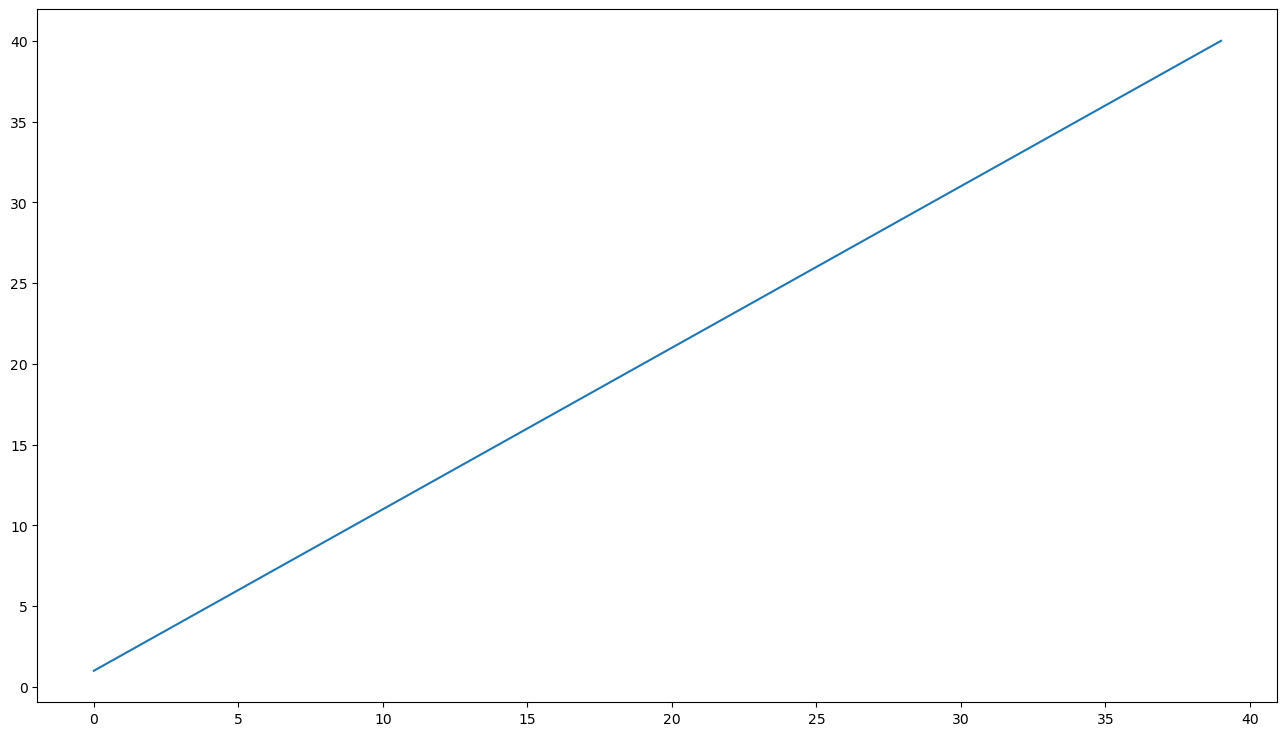

In [105]:
sample_data = list(range(1, 41))

pd.Series(sample_data).plot()
plt.show()

In [112]:
standart_scaled_sample_data = [(i - np.mean(sample_data)) / np.std(sample_data) for i in sample_data]

scalling_test_df = pd.DataFrame(zip(sample_data, standart_scaled_sample_data),
                                columns= ['Sample_Data', 'Standart Scaler'])

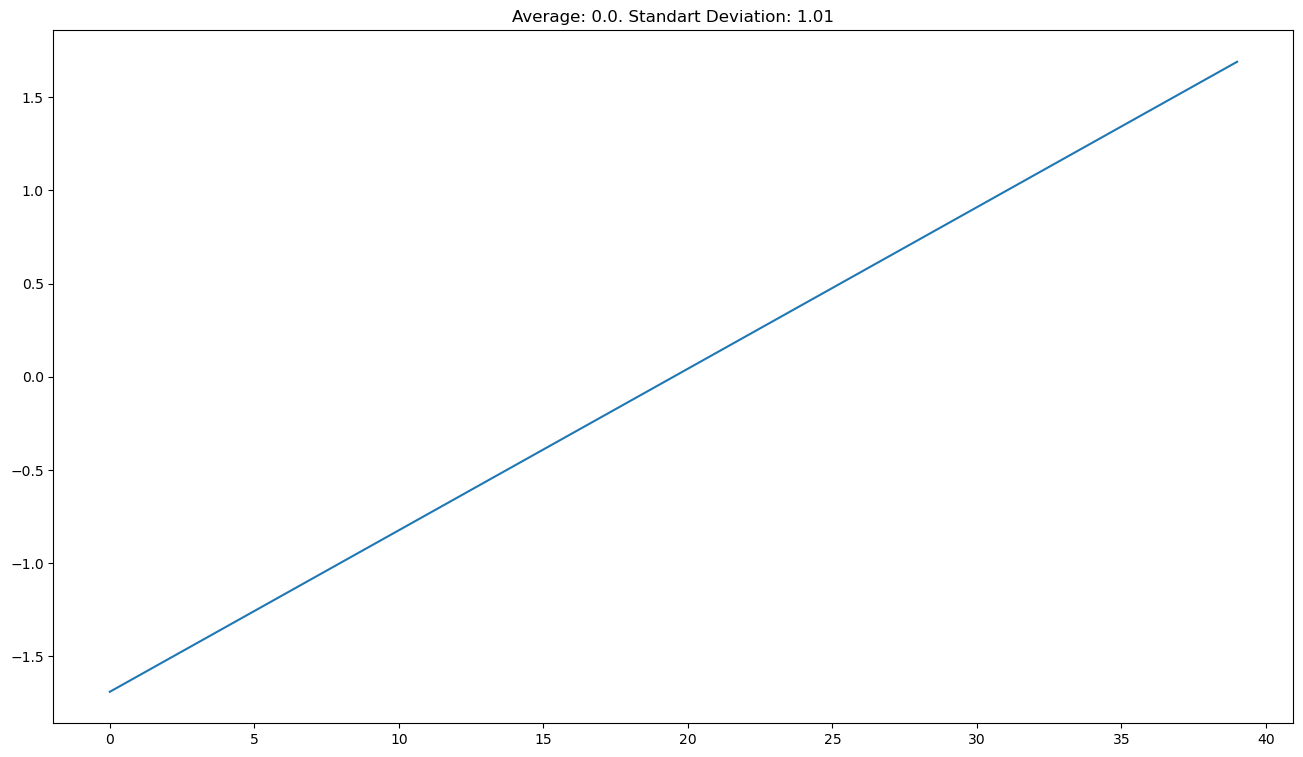

In [120]:
scalling_test_df['Standart Scaler'].plot()
plt.title(f"Average: {round(scalling_test_df['Standart Scaler'].mean(), 3)}. Standart Deviation: {round(scalling_test_df['Standart Scaler'].std(), 2)}")
plt.show()

In [123]:
# Standart Scaler

# StandardScaler()

(90 - np.mean(sample_data)) / np.std(sample_data)



6.0207583373565186

In [ ]:
MinMaxScaler(feature_range= (0, 1)) #sabit diapazonda saxlamaq ucun

= (x - min(sample_data)) / (max(sample_data) - min(sample_data))

In [205]:
for_min_max_scaller = [i ** 2 for i  in range(40)]

0

In [209]:
(1 - 0) / (1521 - 0)

0.9493754109138725

In [223]:
# pd.Series(np.array([1,2,3,4,5,6])).sort_values()

In [222]:
MinMaxScaler().fit_transform(np.array(for_min_max_scaller).reshape(-1, 1)).round(2)

array([[0.  ],
       [0.  ],
       [0.  ],
       [0.01],
       [0.01],
       [0.02],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.07],
       [0.08],
       [0.09],
       [0.11],
       [0.13],
       [0.15],
       [0.17],
       [0.19],
       [0.21],
       [0.24],
       [0.26],
       [0.29],
       [0.32],
       [0.35],
       [0.38],
       [0.41],
       [0.44],
       [0.48],
       [0.52],
       [0.55],
       [0.59],
       [0.63],
       [0.67],
       [0.72],
       [0.76],
       [0.81],
       [0.85],
       [0.9 ],
       [0.95],
       [1.  ]])

In [ ]:
np.array(for_min_max_scaller).reshape(-1, 1)

In [199]:
robust_scaler = RobustScaler(quantile_range= (0, 85)) #(Value - median) / IQR

In [200]:
robust_scaled_anormal_dist = robust_scaler.fit_transform(np.array(anormal_distrubited_data).reshape(-1, 1))

In [ ]:
(i - np.median(anormal_distrubited_data)) / (np.quantile(anormal_distrubited_data, 0.75) - np.quantile(anormal_distrubited_data, 0.25))

In [198]:
(0 - np.median(robust_scaled_anormal_dist)) / \
(np.quantile(anormal_distrubited_data, 0.85) - np.quantile(anormal_distrubited_data, 0))

0.0

In [201]:
pd.DataFrame(zip(anormal_distrubited_data,robust_scaled_anormal_dist))

,0,1
0,0,[-0.00053509613207819]
1,1,[-0.0005076553047921289]
2,2,[-0.0004802144775060679]
3,3,[-0.00045277365022000686]
4,4,[-0.00042533282293394587]
5,5,[-0.0003978919956478848]
6,6,[-0.0003704511683618238]
7,7,[-0.0003430103410757628]
8,8,[-0.0003155695137897018]
9,9,[-0.00028812868650364074]


In [ ]:
rob

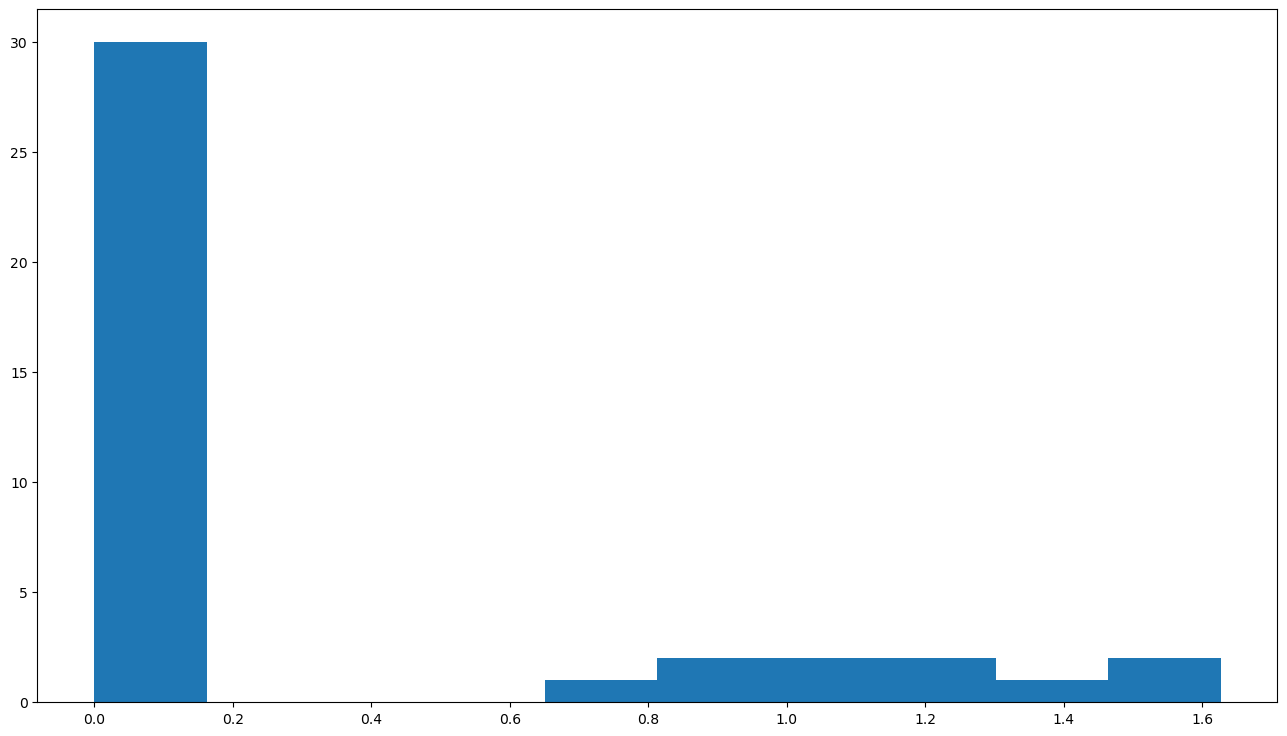

In [202]:
plt.hist(robust_scaled_anormal_dist)
plt.show()

In [182]:
[round(i / np.sum(anormal_distrubited_data), 3) for i in anormal_distrubited_data]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.064,
 0.071,
 0.078,
 0.086,
 0.094,
 0.102,
 0.111,
 0.121,
 0.131,
 0.141]

In [167]:
anormal_distrubited_data = [i for i in range(30)] + [i **3 for i in range(30, 40)]

In [168]:
np.mean(anormal_distrubited_data)

10490.25

In [169]:
np.median(anormal_distrubited_data)

19.5

In [170]:
scalling_test_df['Anormal_Data'] = anormal_distrubited_data

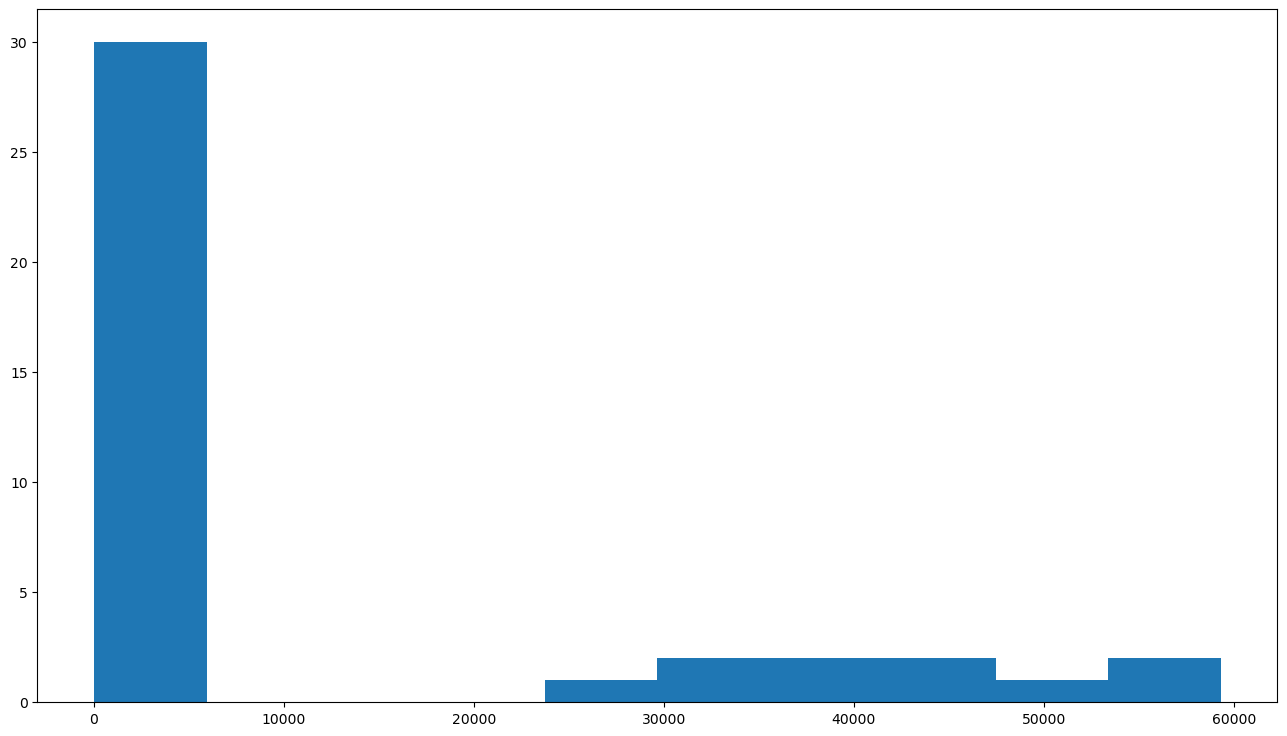

In [171]:
plt.hist(anormal_distrubited_data)
plt.show()

In [ ]:
#(Value - median) / IQR

In [172]:
robust_scaled_anormal_data = [((i - np.median(anormal_distrubited_data)) / (np.quantile(anormal_distrubited_data, 0.75) - np.quantile(anormal_distrubited_data, 0.25)))\
 for i in anormal_distrubited_data]

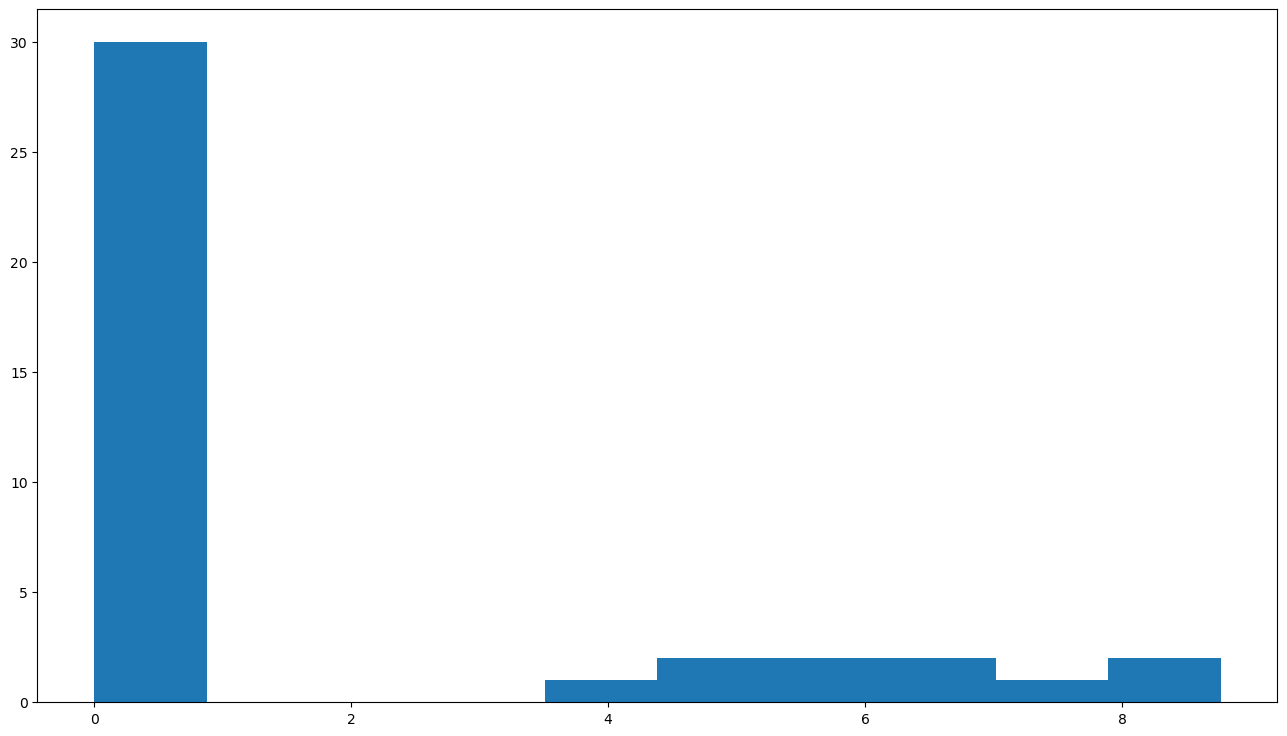

In [173]:
plt.hist(robust_scaled_anormal_data)
plt.show()

In [174]:
pd.Series(anormal_distrubited_data)

0         0
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10
11       11
12       12
13       13
14       14
15       15
16       16
17       17
18       18
19       19
20       20
21       21
22       22
23       23
24       24
25       25
26       26
27       27
28       28
29       29
30    27000
31    29791
32    32768
33    35937
34    39304
35    42875
36    46656
37    50653
38    54872
39    59319
dtype: int64

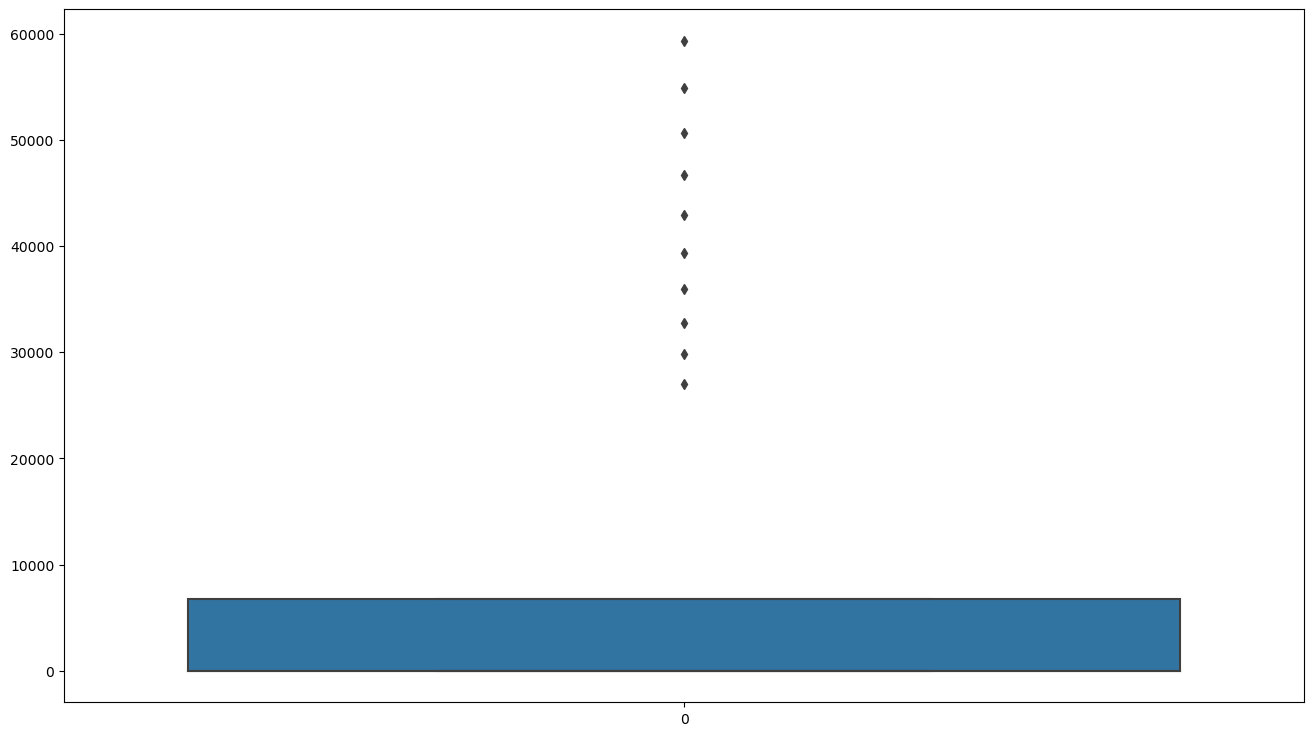

In [176]:
sns.boxplot(anormal_distrubited_data)
plt.show()

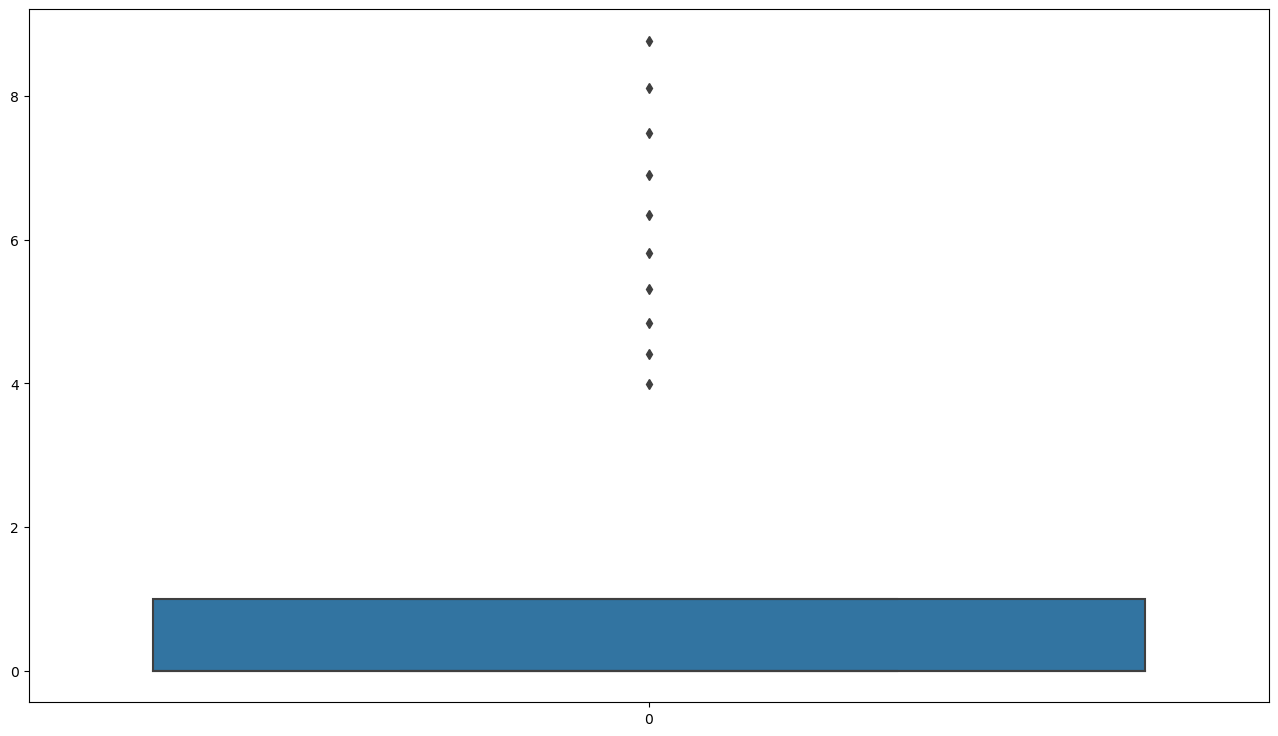

In [177]:
sns.boxplot(robust_scaled_anormal_data)
plt.show()

## Step 4(Optional): Adding New Columns

In [259]:
df['Trip_distance>100_km?'] =\
[1 if val > 100 else 0 for val in df['Trip_Distance_km']]

## Data Modelling

In [317]:
df_copy = df.copy()

In [318]:
df_copy['Expense_for_km'] = df_copy['Per_Km_Rate'] * df['Trip_Distance_km']
df_copy['Expense_for_km'] = df_copy['Expense_for_km'] + df['Base_Fare']
df_copy['Expense_for_duration'] = df_copy['Per_Minute_Rate'] * df['Trip_Duration_Minutes']

In [319]:
df_copy.drop(['Trip_Distance_km', 'Per_Km_Rate', 'Trip_Duration_Minutes', 'Per_Minute_Rate', 'Base_Fare'],
             
#               'Day_of_Week', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
#        'Weather_Rain', 'Weather_Snow', 'Time_of_Day_Evening',
#        'Time_of_Day_Morning', 'Time_of_Day_Night',
             axis= 1, 
             inplace= True)

<AxesSubplot: >

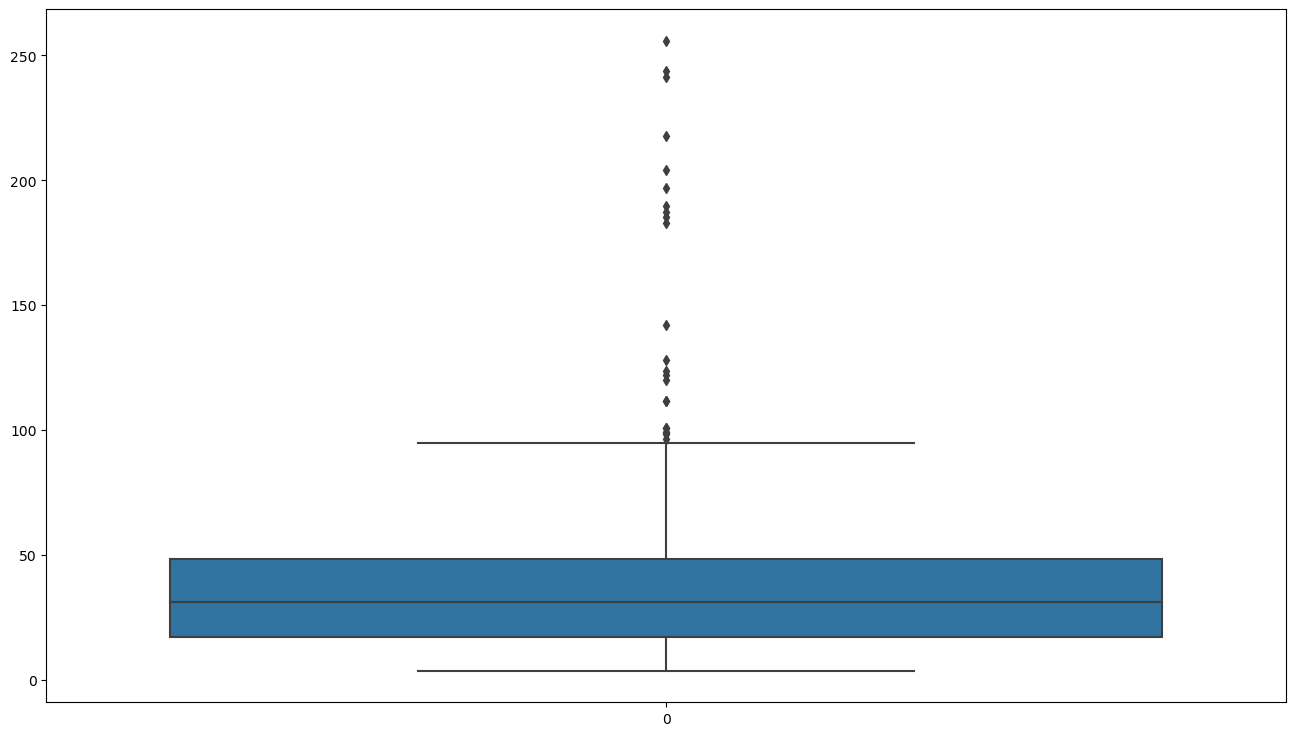

In [308]:
sns.boxplot(df_copy['Expense_for_km'])

In [327]:
y = df_copy['Trip_Price']
X = df_copy.drop('Trip_Price', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state= 42)

min_max_scl = RobustScaler(quantile_range= (0, 92))
X_train = min_max_scl.fit_transform(X_train)
X_test = min_max_scl.fit_transform(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
predictions = lin_model.predict(X_test)
lin_model_result = pd.DataFrame(zip(predictions, y_test),
             columns= ['Predictions', 'Real'])


#xgboost
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
predictions = xgb_reg.predict(X_test)
xgb_reg_result = pd.DataFrame(zip(predictions, y_test),
             columns= ['Predictions', 'Real'])



In [328]:
xgb_reg_result

,Predictions,Real
0,24.390532,22.0141
1,55.568501,60.7394
2,42.254261,45.5132
3,75.116287,78.7440
4,61.296600,65.0840
...,...,...
192,66.975609,65.2320
193,76.438553,84.1558
194,56.340336,57.0766
195,44.321518,41.2691


In [296]:
df_copy.columns

Index(['Day_of_Week', 'Traffic_Conditions_Low', 'Traffic_Conditions_Medium',
       'Weather_Rain', 'Weather_Snow', 'Time_of_Day_Evening',
       'Time_of_Day_Morning', 'Time_of_Day_Night', 'Trip_Price',
       'Trip_distance>100_km?', 'Expense_for_km', 'Expense_for_duration'],
      dtype='object')

In [323]:
pd.Series(lin_model.coef_)

0      0.051644
1     -1.278577
2     -0.604643
3     -1.781109
4     -1.627727
5     -0.651495
6      0.172480
7     -1.504000
8     83.242193
9     55.104654
10    31.958206
dtype: float64

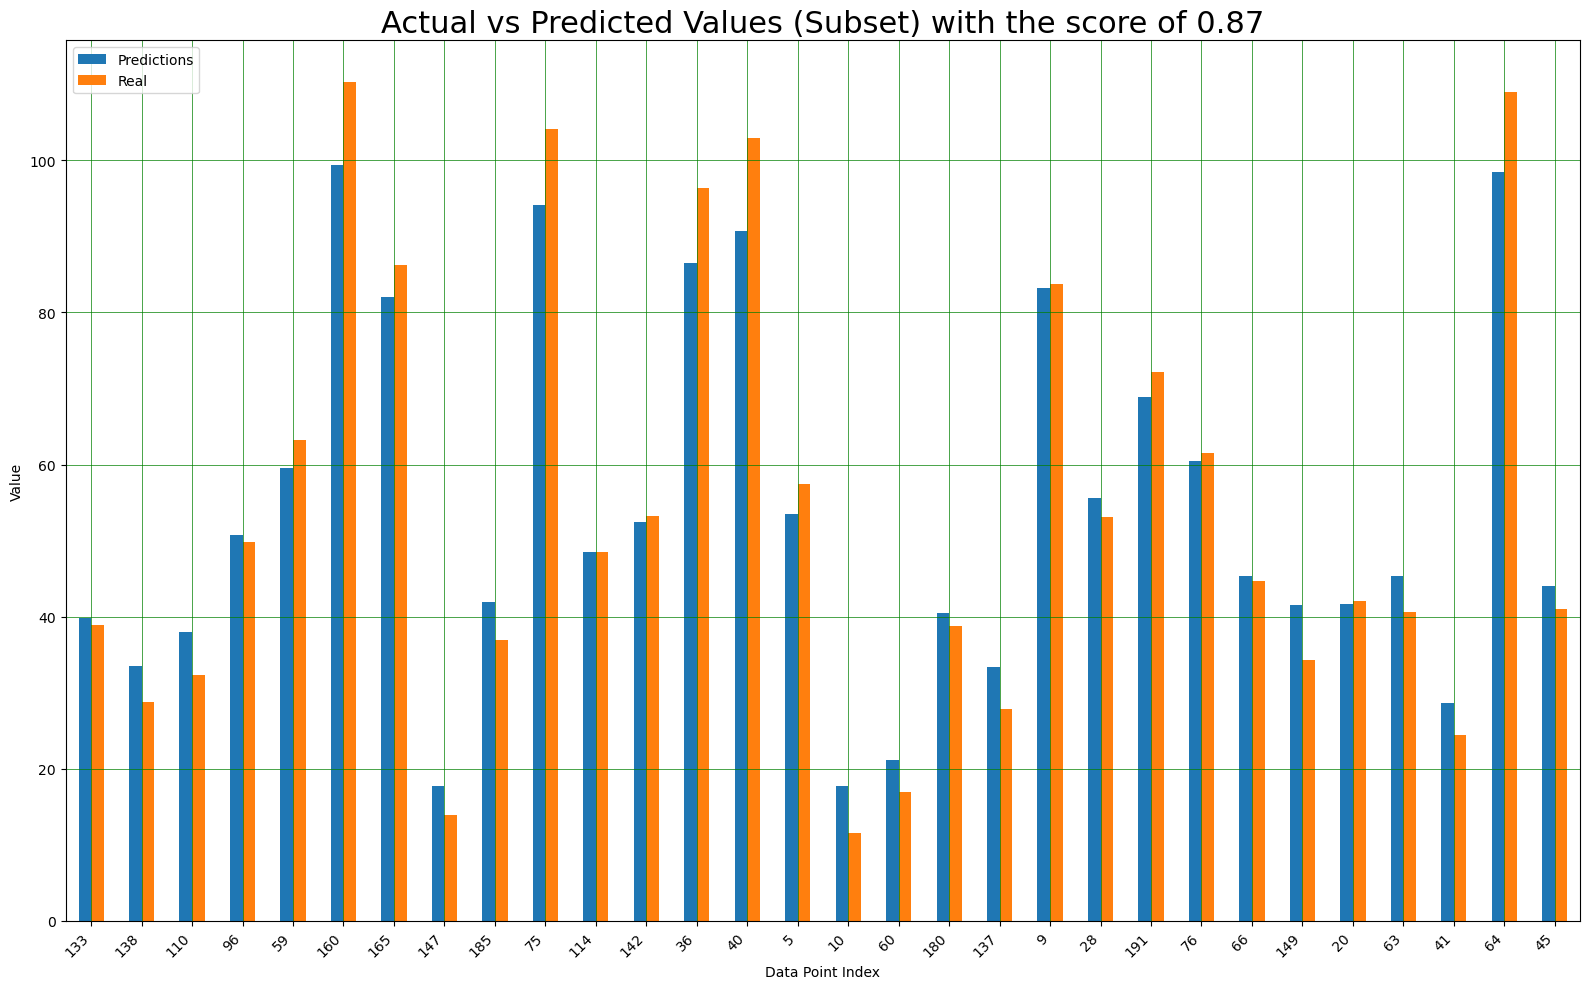

In [326]:
# lin_model_result_sample = lin_model_result.drop('Diff', axis= 1)
lin_model_result_sample = lin_model_result.sample(30)
lin_model_result_sample.plot(kind='bar', figsize=(16, 10))
plt.title(f'Actual vs Predicted Values (Subset) with the score of {round(r2_score(y_test, predictions), 2)}', fontsize = 22)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.grid(which='major', linestyle= '-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle= ':', linewidth='0.5', color='black')
plt.xticks(rotation= 45, ha='right') # Rotate x-axis labels for better readability if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

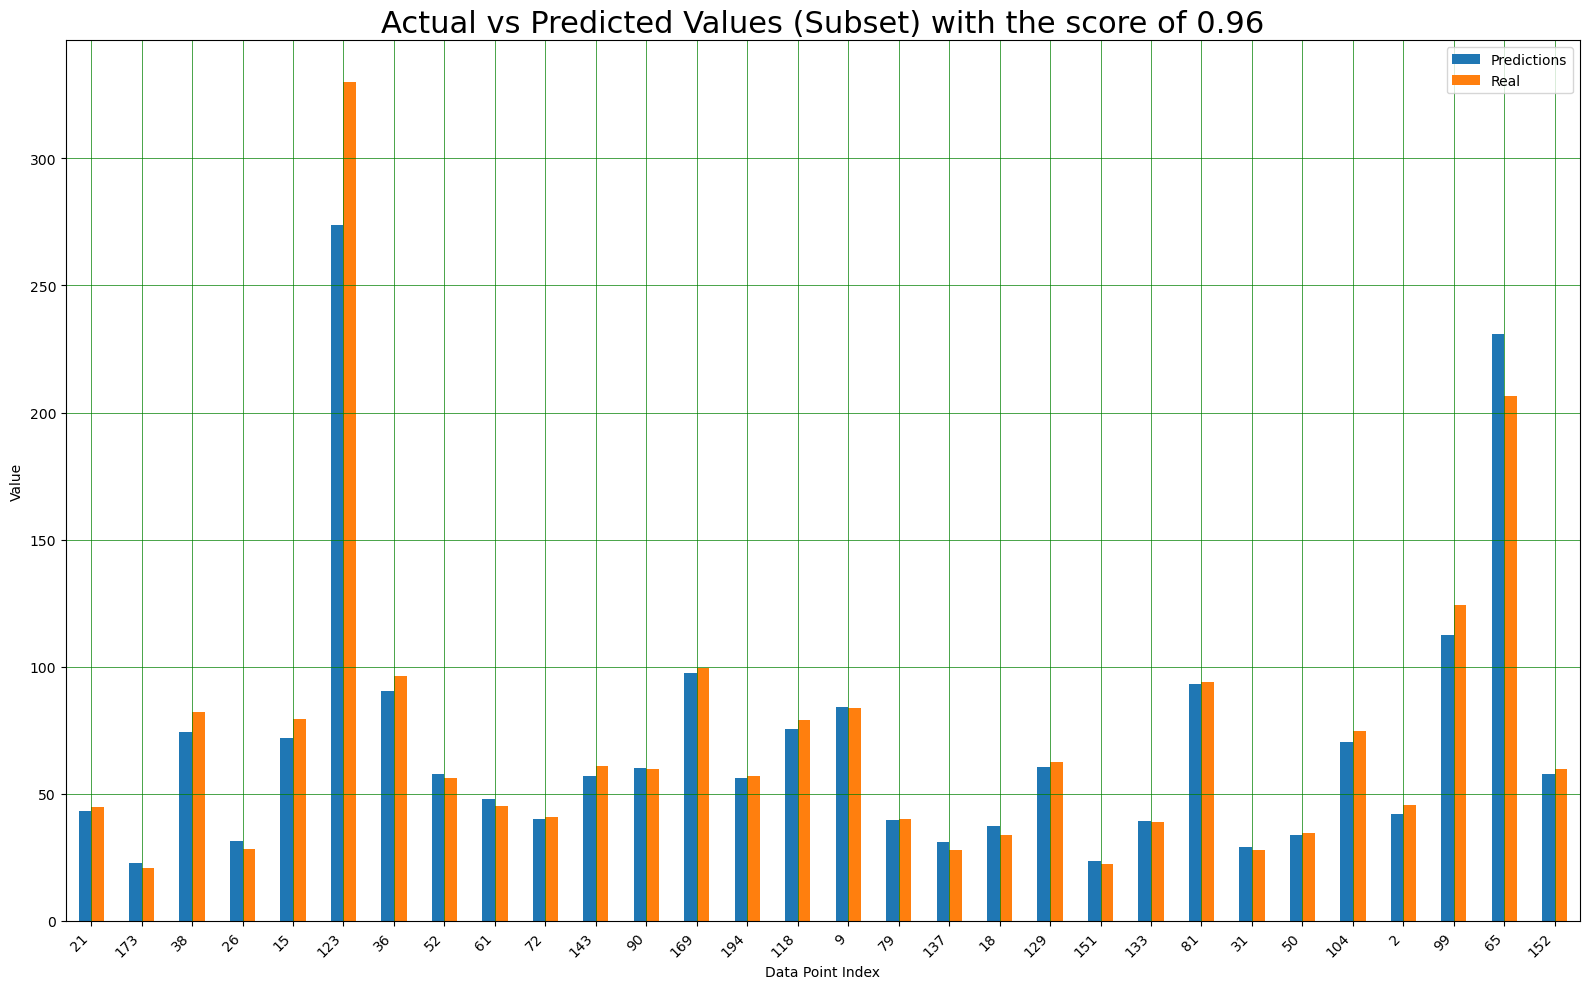

In [329]:
# lin_model_result_sample = lin_model_result.drop('Diff', axis= 1)
xgb_reg_result_sample = xgb_reg_result.sample(30)
xgb_reg_result_sample.plot(kind='bar', figsize=(16, 10))
plt.title(f'Actual vs Predicted Values (Subset) with the score of {round(r2_score(y_test, predictions), 2)}', fontsize = 22)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.grid(which='major', linestyle= '-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle= ':', linewidth='0.5', color='black')
plt.xticks(rotation= 45, ha='right') # Rotate x-axis labels for better readability if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [232]:
mean_absolute_error(y_test, 
                    predictions)

31.10746879667238

In [233]:
lin_model_result['Diff'] = lin_model_result['Real'] - \
lin_model_result['Predictions']

In [429]:
lin_model_result.sort_values(by= 'Diff')

,Predictions,Real,Diff
61,42.858834,19.973000,-22.885834
0,63.608673,43.199800,-20.408873
4,39.474489,20.008300,-19.466189
176,45.386333,28.596600,-16.789733
165,48.991896,32.428200,-16.563696
...,...,...,...
90,91.269788,109.430400,18.160612
178,23.559720,42.423200,18.863480
143,116.782904,138.642500,21.859596
182,289.502472,320.958664,31.456192


In [436]:
lin_model.coef_

array([-1.13016231e-01,  2.68752642e+00,  1.76682792e+02,  3.63457751e+01,
        3.22191043e+01,  2.46497314e+01, -1.43090678e+00, -8.30875811e-01,
        9.76057573e-02, -8.13725898e-02, -6.43296564e-01,  3.25691428e-01,
       -2.81760721e+00,  1.00028709e+02])

In [431]:
lin_model.intercept_

-22.600103913627287

In [366]:
df.loc[178]

#pred = 10

Day_of_Week                   0.0000
Base_Fare                     4.1400
Trip_Distance_km             46.9000
Per_Km_Rate                   1.3300
Trip_Duration_Minutes        66.3800
Per_Minute_Rate               0.1300
Traffic_Conditions_Low        0.0000
Traffic_Conditions_Medium     0.0000
Weather_Rain                  0.0000
Weather_Snow                  0.0000
Time_of_Day_Evening           1.0000
Time_of_Day_Morning           0.0000
Time_of_Day_Night             0.0000
Trip_Price                   75.1464
Name: 178, dtype: float64